In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

In [394]:
pd.plotting.register_matplotlib_converters()
df=pd.read_csv('data.csv')
df['day'] = pd.to_datetime(df['day'],dayfirst=True)
df=df.set_index('day')
df.index = pd.DatetimeIndex(df.index).to_period('D')
df=df[df.index<'2022-01-16']

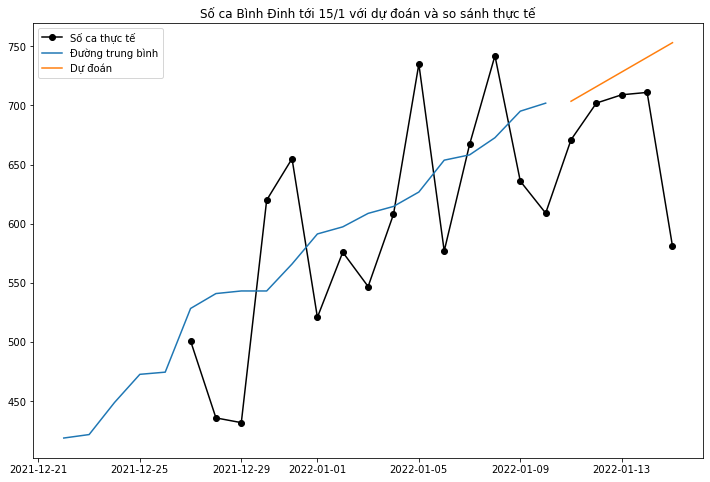

Predict: 
day
 2022-01-11    703.532410
2022-01-12    715.902406
2022-01-13    728.272401
2022-01-14    740.642397
2022-01-15    753.012392
Freq: D, Name: Predict, dtype: float64 

Realtime: 
 day
2022-01-11    671.0
2022-01-12    702.0
2022-01-13    709.0
2022-01-14    711.0
2022-01-15    581.0
Freq: D, Name: cases, dtype: float64 



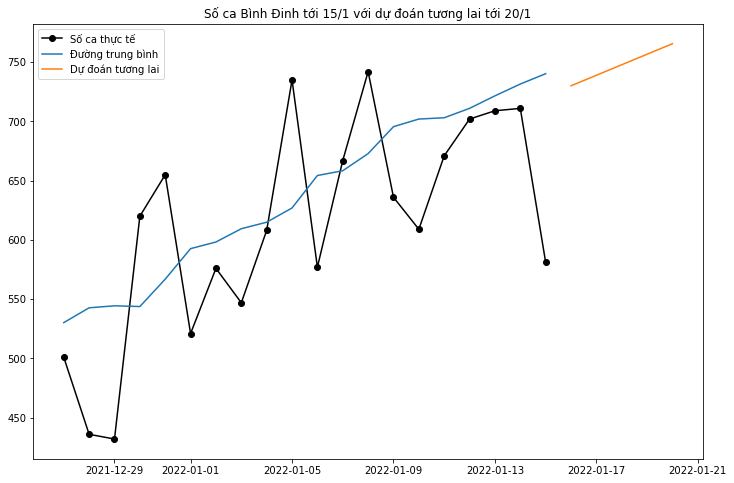

2022-01-16    730.057165
2022-01-17    738.940883
2022-01-18    747.824601
2022-01-19    756.708320
2022-01-20    765.592038
Freq: D, Name: Predict, dtype: float64


In [395]:
ts=df[df['province']=='37_BĐ']['cases'].diff()[300:-5]
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
ts=df[df['province']=='37_BĐ']['cases'].diff()[300:]
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán')
plt.title('Số ca Bình Đinh tới 15/1 với dự đoán và so sánh thực tế')
plt.legend()
plt.show()
fit1.params_formatted
print("Predict: \nday\n",fcast1,'\n')
print("Realtime: \n",df[df['province']=='37_BĐ']['cases'].diff().tail(5),'\n')
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán tương lai')
plt.title('Số ca Bình Đinh tới 15/1 với dự đoán tương lai tới 20/1')
plt.legend()
plt.show()
print(fcast1)

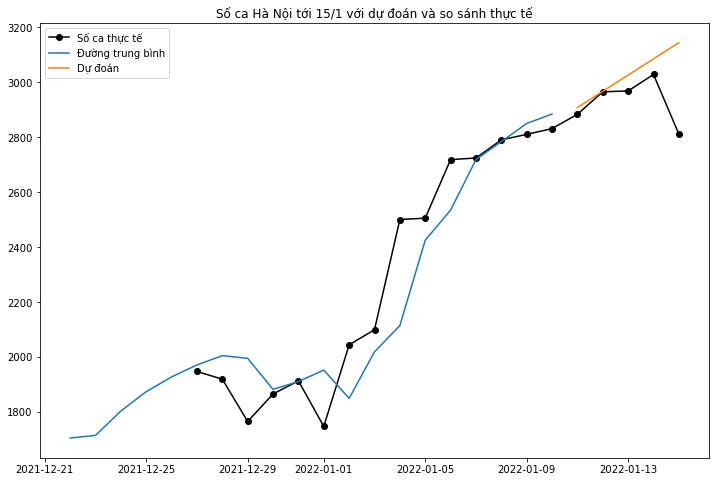

Predict: 
day
 2022-01-11    2908.635258
2022-01-12    2967.644440
2022-01-13    3026.653623
2022-01-14    3085.662805
2022-01-15    3144.671987
Freq: D, Name: Predict, dtype: float64 

Realtime: 
 day
2022-01-11    2884.0
2022-01-12    2966.0
2022-01-13    2969.0
2022-01-14    3029.0
2022-01-15    2812.0
Freq: D, Name: cases, dtype: float64 



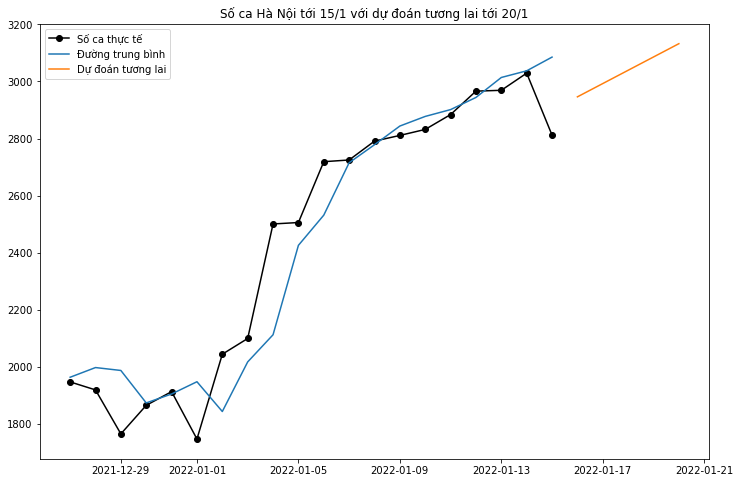

2022-01-16    2946.055602
2022-01-17    2992.585276
2022-01-18    3039.114951
2022-01-19    3085.644626
2022-01-20    3132.174300
Freq: D, Name: Predict, dtype: float64


In [396]:
ts=df[df['province']=='01_HN']['cases'].diff()[300:-5]
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
ts=df[df['province']=='01_HN']['cases'].diff()[300:]
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán')
plt.title('Số ca Hà Nội tới 15/1 với dự đoán và so sánh thực tế')
plt.legend()
plt.show()
fit1.params_formatted
print("Predict: \nday\n",fcast1,'\n')
print("Realtime: \n",df[df['province']=='01_HN']['cases'].diff().tail(5),'\n')
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán tương lai')
plt.title('Số ca Hà Nội tới 15/1 với dự đoán tương lai tới 20/1')
plt.legend()
plt.show()
print(fcast1)

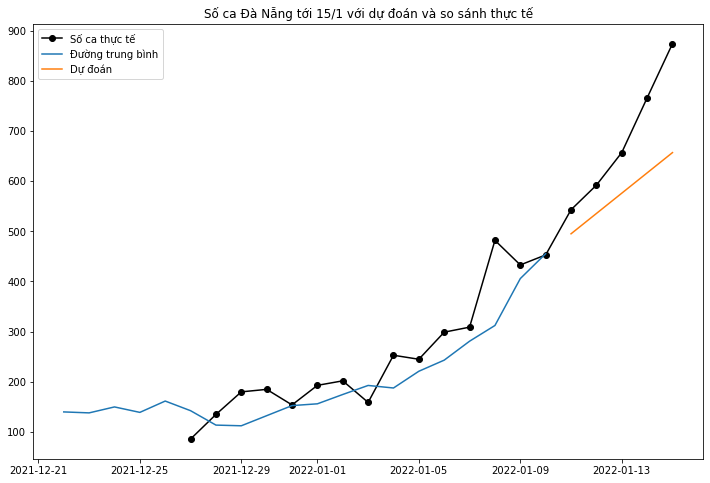

Predict: 
day
 2022-01-11    495.069250
2022-01-12    535.535314
2022-01-13    576.001378
2022-01-14    616.467441
2022-01-15    656.933505
Freq: D, Name: Predict, dtype: float64 

Realtime: 
 day
2022-01-11    543.0
2022-01-12    592.0
2022-01-13    657.0
2022-01-14    766.0
2022-01-15    874.0
Freq: D, Name: cases, dtype: float64 



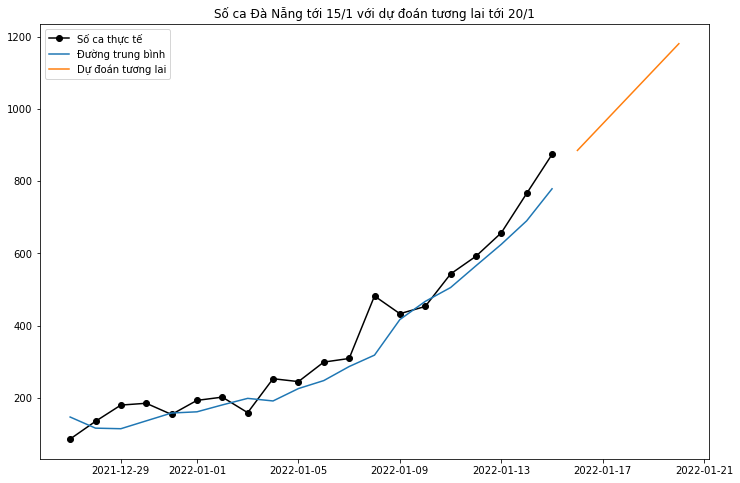

2022-01-16     884.982841
2022-01-17     958.868856
2022-01-18    1032.754870
2022-01-19    1106.640884
2022-01-20    1180.526899
Freq: D, Name: Predict, dtype: float64


In [397]:
ts=df[df['province']=='04_ĐN']['cases'].diff()[300:-5]
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
ts=df[df['province']=='04_ĐN']['cases'].diff()[300:]
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán')
plt.title('Số ca Đà Nẵng tới 15/1 với dự đoán và so sánh thực tế')
plt.legend()
plt.show()
fit1.params_formatted
print("Predict: \nday\n",fcast1,'\n')
print("Realtime: \n",df[df['province']=='04_ĐN']['cases'].diff().tail(5),'\n')
fit1 = Holt(ts, initialization_method="estimated").fit()
fcast1 = fit1.forecast(5).rename("Predict")
plt.figure(figsize=(12, 8))
plt.plot(ts.tail(20).index.to_timestamp(),ts.tail(20).values,marker="o", color="black",label='Số ca thực tế') 
plt.plot(pd.DataFrame(fit1.fittedvalues).tail(20).index.to_timestamp(),pd.DataFrame(fit1.fittedvalues).tail(20).values,label='Đường trung bình')
plt.plot(pd.DataFrame(fcast1).tail(20).index.to_timestamp(),pd.DataFrame(fcast1).tail(20),label = 'Dự đoán tương lai')
plt.title('Số ca Đà Nẵng tới 15/1 với dự đoán tương lai tới 20/1')
plt.legend()
plt.show()
print(fcast1)

In [398]:
df.groupby('day').sum()['cases']

day
2020-03-18         56
2020-03-19         62
2020-03-20         67
2020-03-21         68
2020-03-22         80
               ...   
2022-01-11    2002320
2022-01-12    2033577
2022-01-13    2053271
2022-01-14    2072340
2022-01-15    2091530
Freq: D, Name: cases, Length: 639, dtype: int64